<font color='pink'> *Uczenie maszynowe* </font>

## TEMAT 4: Klasyfikatory (NM, NN, kNN, SVM)

<font color='orange'> Prowadząca: dr inż. Urszula Libal </font>

 ---

# 1. Nearest Mean (NM)

## 1.1. Pierwsza próba klasyfikacji pojedynczego obiektu

In [2]:
# ZAD.1 Nearest Mean

# Uwaga: w dokumentacji scikit-learn nazywany klasyfikatorem Nearest Centroid

import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]]) # cechy
y = np.array([1, 1, 1, 2, 2, 2]) # klasy

from sklearn.neighbors import NearestCentroid
nm = NearestCentroid()
nm.fit(X, y) # uczenie

print("Obiekt [-0.8, -1] klasyfikujemy do", nm.predict([[-0.8, -1]])) # klasyfikujemy obiekt o cechach [-0.8, -1]
print("Obiekt [1.2, 0] klasyfikujemy do", nm.predict([[1.2, 0]])) # klasyfikujemy obiekt o cechach [1.2, 0]
print("Obiekt [3.2, 1.4] klasyfikujemy do", nm.predict([[3.2, 1.4]])) # klasyfikujemy obiekt o cechach [3.2, 1.4]



# Ile wynoszą średnie w klasach?
print("\n Centra: \n", nm.centroids_)

Obiekt [-0.8, -1] klasyfikujemy do [1]
Obiekt [1.2, 0] klasyfikujemy do [2]
Obiekt [3.2, 1.4] klasyfikujemy do [2]

 Centra: 
 [[-2.         -1.33333333]
 [ 2.          1.33333333]]


## 1.2. Obszary decyzyjne

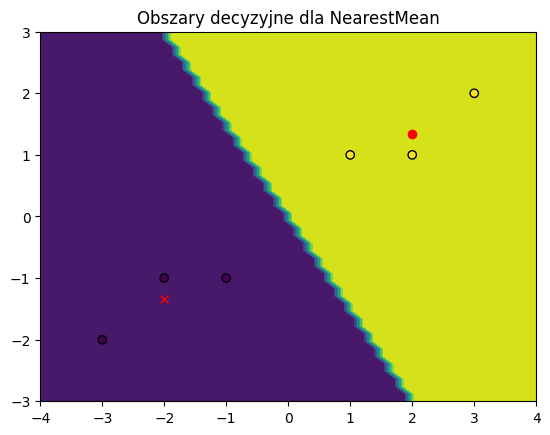

In [3]:
# ZAD.2 Obszary decyzyjne (metryka euklidesowa)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import NearestCentroid

feature_1, feature_2 = np.meshgrid(
    np.linspace(-4, 4),
    np.linspace(-3, 3)
)
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T


nm = NearestCentroid().fit(X, y) # domyślna metryka euklidesowa
y_pred = np.reshape(nm.predict(grid), feature_1.shape)
display = DecisionBoundaryDisplay(
    xx0=feature_1, xx1=feature_2, response=y_pred
)
display.plot()

display.ax_.scatter(
    X[:, 0], X[:, 1], c=y, edgecolor="black"
)

plt.plot(nm.centroids_[0][0], nm.centroids_[0][1], 'xr') # średnia w klasie 1
plt.plot(nm.centroids_[1][0], nm.centroids_[1][1], 'or') # średnia w klasie 2

plt.title("Obszary decyzyjne dla NearestMean")
plt.show()

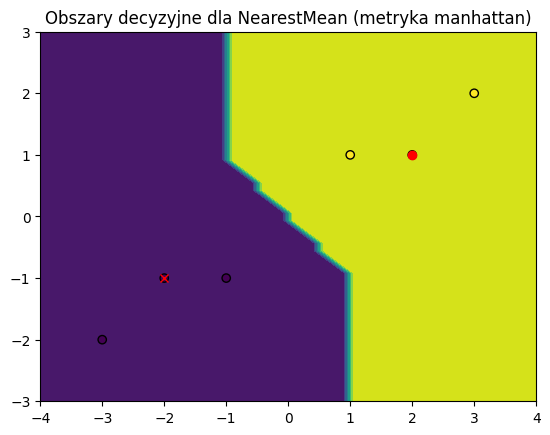

In [4]:
# ZAD.3 Obszary decyzyjne (metryka Manhattan)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import NearestCentroid

feature_1, feature_2 = np.meshgrid(
    np.linspace(-4, 4),
    np.linspace(-3, 3)
)
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T


nm2 = NearestCentroid(metric='manhattan').fit(X, y)
y_pred = np.reshape(nm2.predict(grid), feature_1.shape)
display = DecisionBoundaryDisplay(
    xx0=feature_1, xx1=feature_2, response=y_pred
)
display.plot()

display.ax_.scatter(
    X[:, 0], X[:, 1], c=y, edgecolor="black"
)

plt.plot(nm2.centroids_[0][0], nm2.centroids_[0][1], 'xr') # średnia w klasie 1
plt.plot(nm2.centroids_[1][0], nm2.centroids_[1][1], 'or') # średnia w klasie 2

plt.title("Obszary decyzyjne dla NearestMean (metryka manhattan)")
plt.show()


In [5]:
# Porównaj położenie centrów klas dla metryki euklidesowej (zad.2) i metryki manhattan (zad.3).


# centra dla metryki euklidesowej to
print("\n Centra dla metryki euklidesowej: \n", nm.centroids_)
# ...

# centra dla metryki manhattan
print("\n Centra dla metryki manhattan: \n", nm2.centroids_)
# ...


 Centra dla metryki euklidesowej: 
 [[-2.         -1.33333333]
 [ 2.          1.33333333]]

 Centra dla metryki manhattan: 
 [[-2. -1.]
 [ 2.  1.]]



Centrum dla klasy 0


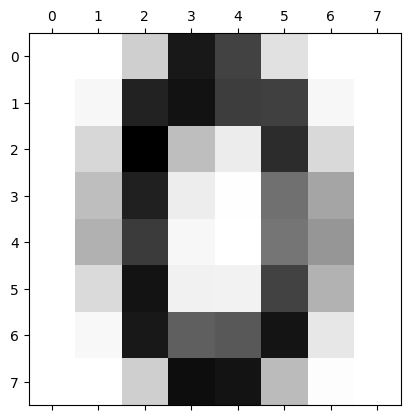


Centrum dla klasy 1


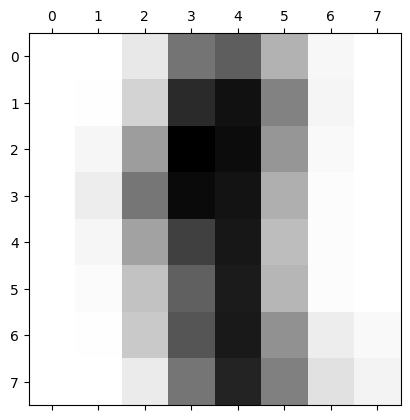


Centrum dla klasy 2


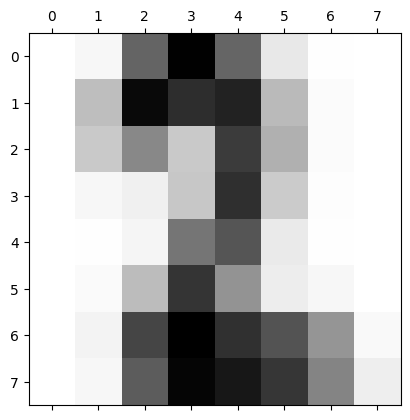


Centrum dla klasy 3


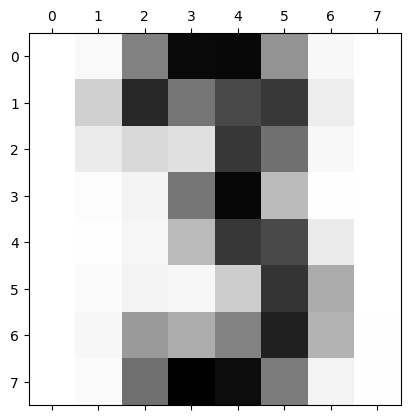


Centrum dla klasy 4


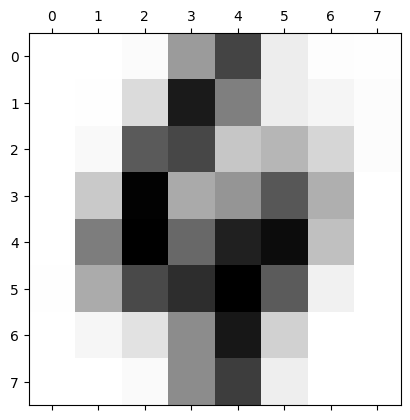


Centrum dla klasy 5


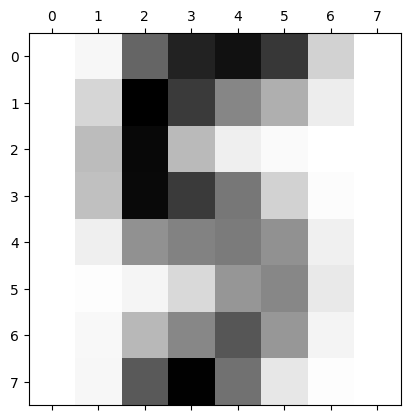


Centrum dla klasy 6


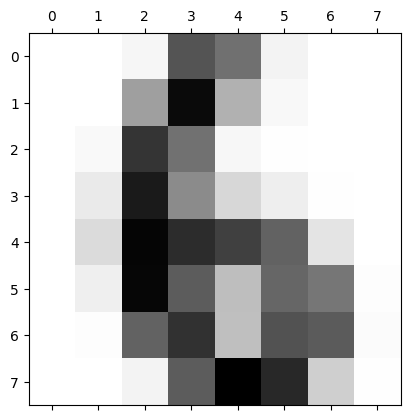


Centrum dla klasy 7


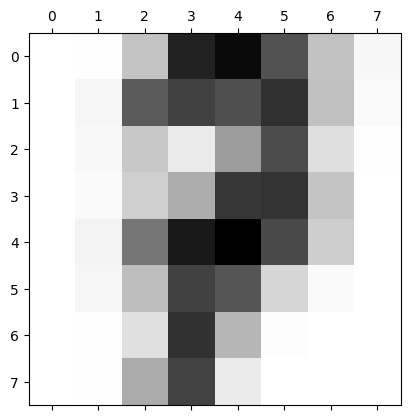


Centrum dla klasy 8


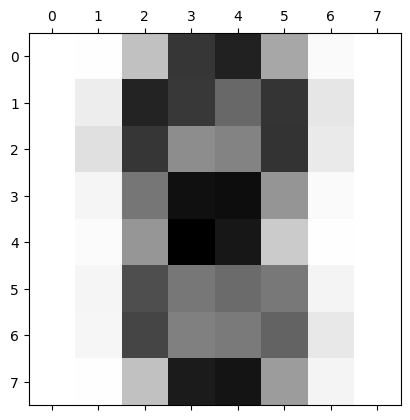


Centrum dla klasy 9


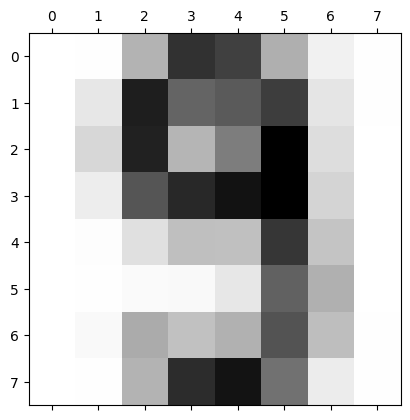

In [6]:
# ZAD.4 Centra (dane Digits)

from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import NearestCentroid

digits = datasets.load_digits()

model = NearestCentroid().fit(digits.data, digits.target)
model.centroids_.shape

for nr_klasy in range(10):
    print("\nCentrum dla klasy",nr_klasy)
    plt.matshow(model.centroids_[nr_klasy].reshape(8,8), cmap='Greys') # 8x8 pixeli
    plt.show()

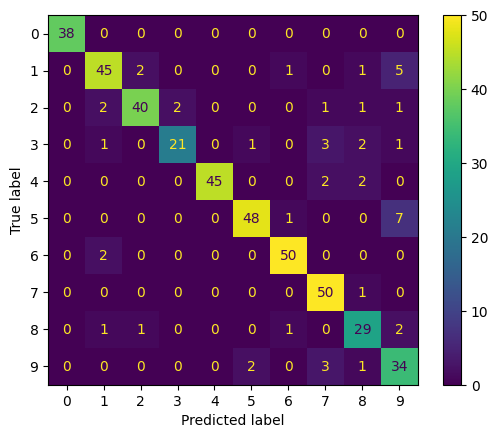

In [7]:
# ZAD.5 Macierz pomyłek (dane Digits)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import NearestCentroid

digits = datasets.load_digits()

# Oblicz macierz pomyłek dla klasyfikatora NearestCentroid oraz danych digits.
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)
model = NearestCentroid().fit(X_train, y_train)
predictions = model.predict(X_test)

cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot()
plt.show()


---

# 2. Nearest Neighbor (NN), k-Nearest Neighbors (kNN)

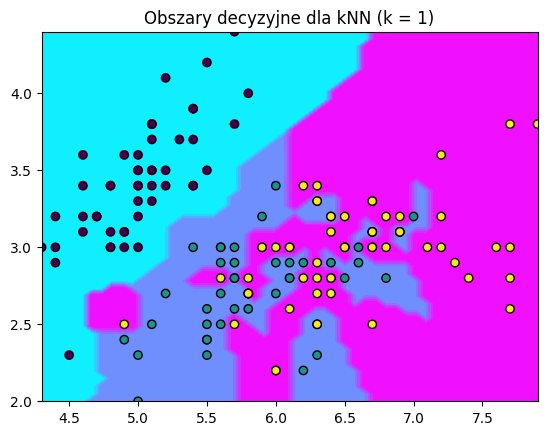

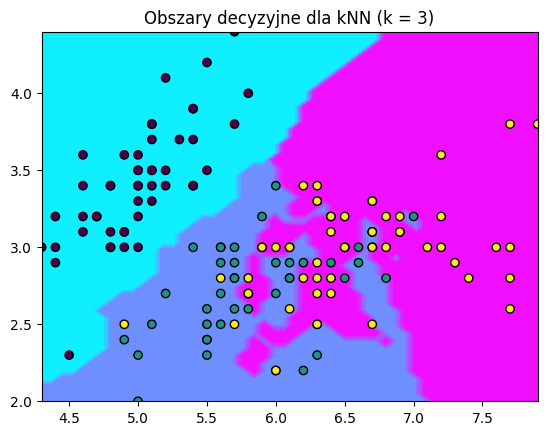

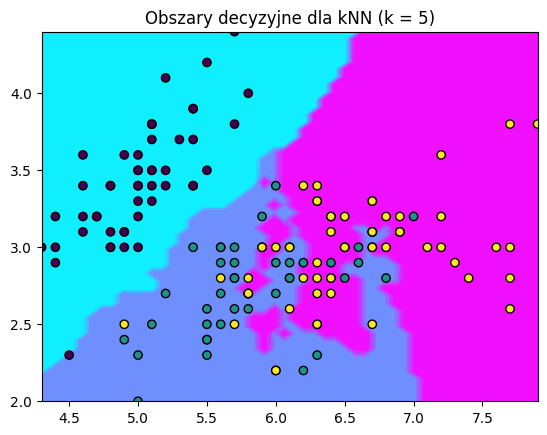

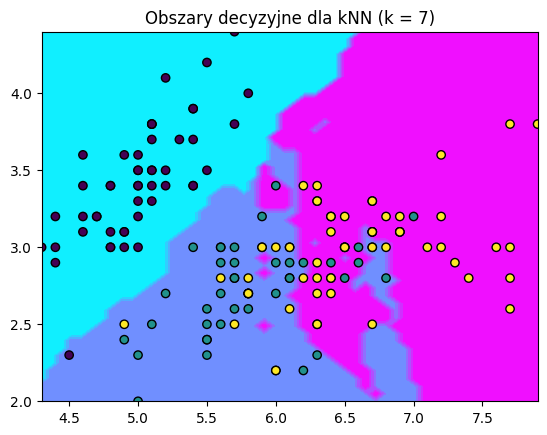

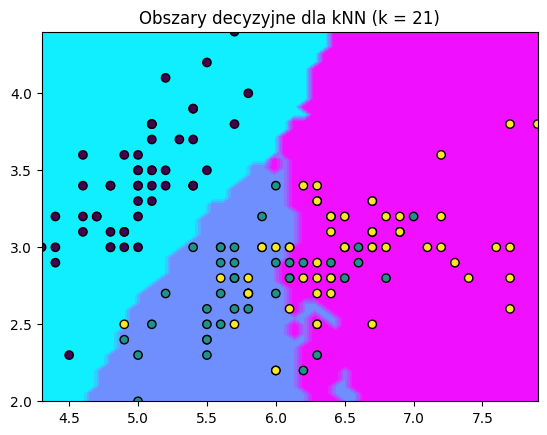

In [8]:
# ZAD.6 Obszary decyzyjne (dane Iris)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
feature_1, feature_2 = np.meshgrid(
    np.linspace(iris.data[:, 0].min(), iris.data[:, 0].max()),
    np.linspace(iris.data[:, 1].min(), iris.data[:, 1].max())
)
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T

for k in [1,3,5,7,21]:
    model = KNeighborsClassifier(n_neighbors=k).fit(iris.data[:, :2], iris.target) # k to liczba najbliższych sąsiadów
    y_pred = np.reshape(model.predict(grid), feature_1.shape)
    display = DecisionBoundaryDisplay(xx0=feature_1, xx1=feature_2, response=y_pred)
    display.plot(cmap="cool")
    display.ax_.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target, edgecolor="black")
    plt.title('Obszary decyzyjne dla kNN (k = {})'.format(k))
    plt.show()

---

# 3. Support Vector Machines (SVM)

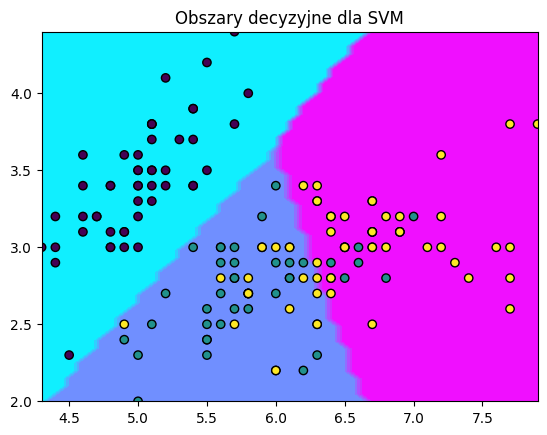

In [9]:
# ZAD.7 Obszary decyzyjne (dane Iris)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC

iris = load_iris()
feature_1, feature_2 = np.meshgrid(
    np.linspace(iris.data[:, 0].min(), iris.data[:, 0].max()),
    np.linspace(iris.data[:, 1].min(), iris.data[:, 1].max())
)
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T

model = SVC().fit(iris.data[:, :2], iris.target)
y_pred = np.reshape(model.predict(grid), feature_1.shape)
display = DecisionBoundaryDisplay(xx0=feature_1, xx1=feature_2, response=y_pred)
display.plot(cmap="cool")
display.ax_.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target, edgecolor="black")
plt.title('Obszary decyzyjne dla SVM')
plt.show()

---

# Porównanie

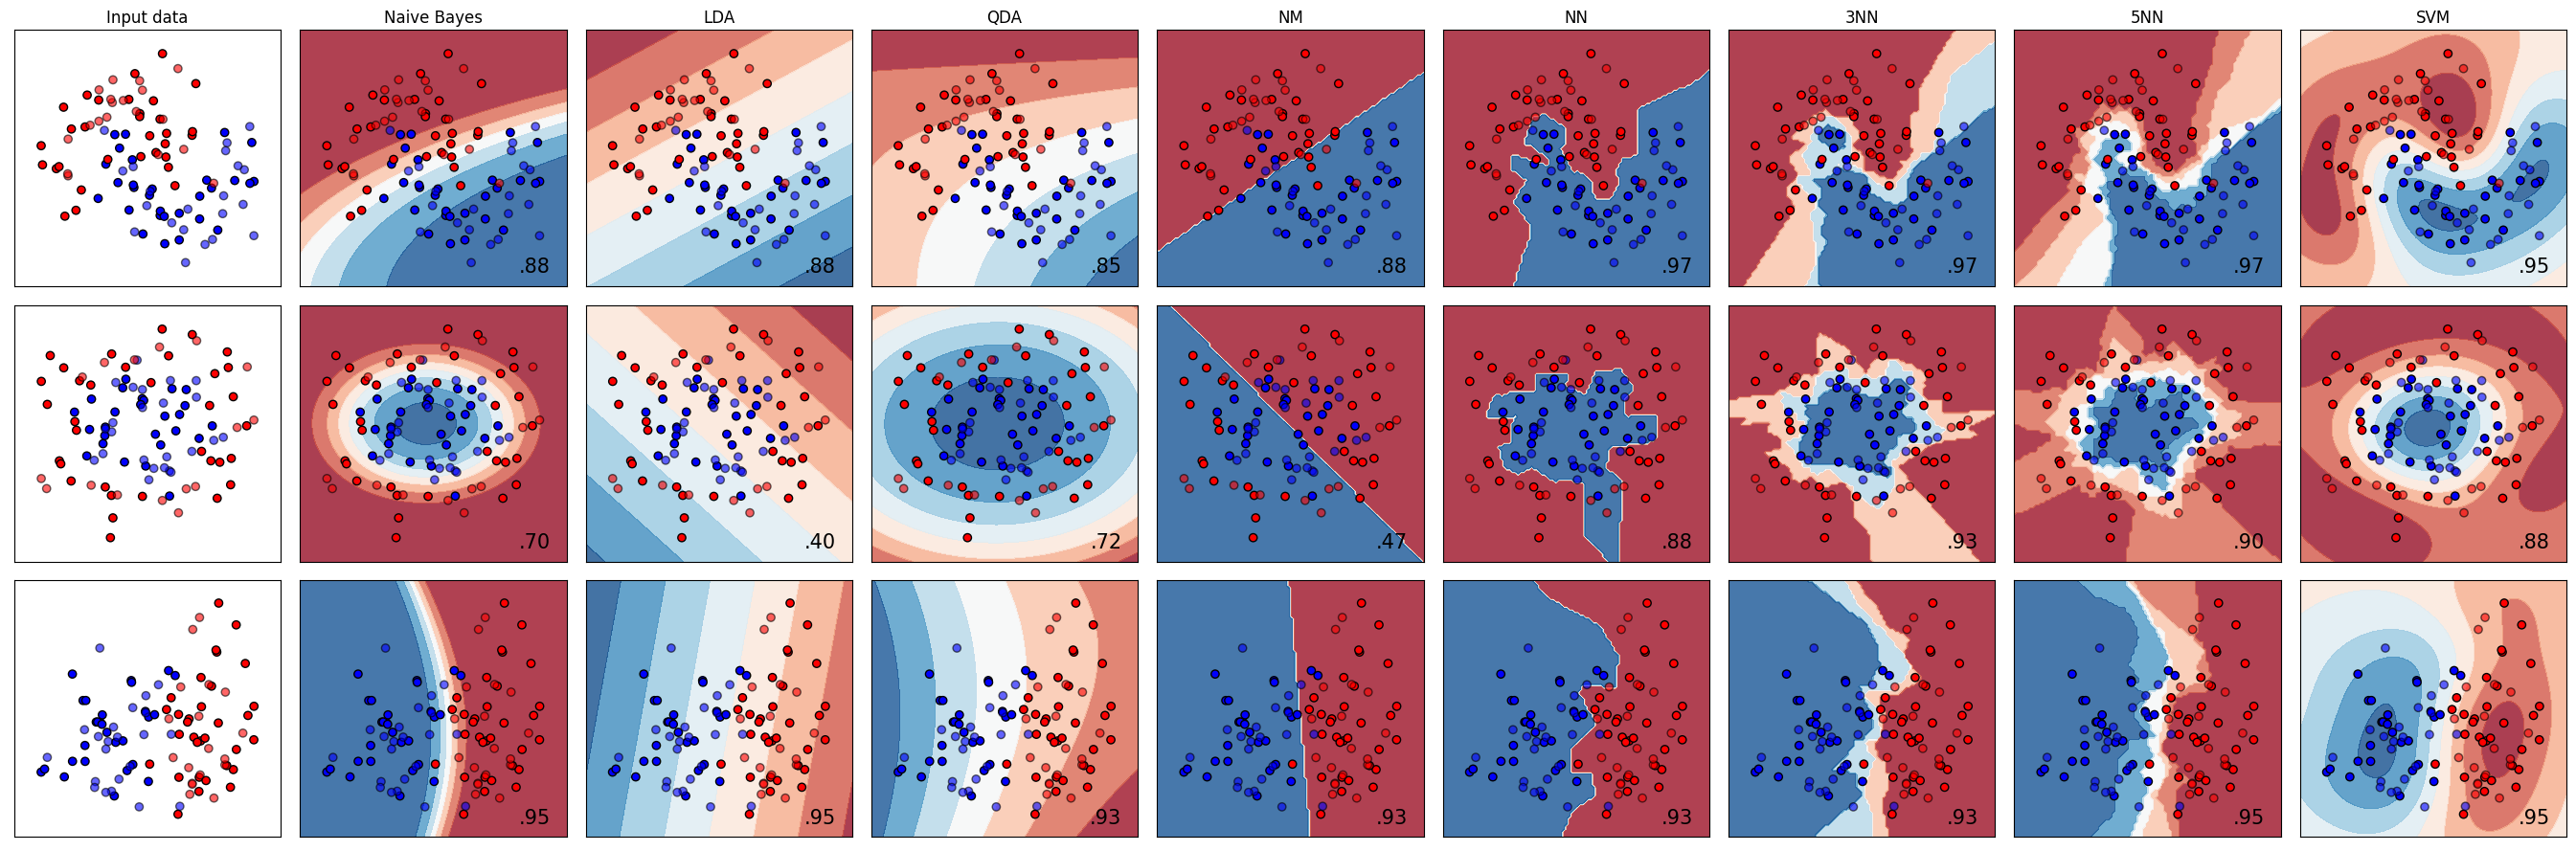

In [10]:
# ZAD.8  Problematyczne rozłożenie danych w klasach

# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# Modified for classes by Urszula Libal
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


names = [
    "Naive Bayes",
    "LDA",
    "QDA",
    "NM",
    "NN",
    "3NN",
    "5NN",
    "SVM",
]

classifiers = [
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    NearestCentroid(),
    KNeighborsClassifier(n_neighbors=1),
    KNeighborsClassifier(n_neighbors=3),
    KNeighborsClassifier(n_neighbors=5),
    SVC()
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()